# Introduction to data analysis - Spring 2021 : Mini-Project

In [1]:
import numpy as np
import statistics
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import re
pd.options.mode.chained_assignment = None

heart_df = pd.read_csv('heart.csv')

Before answering the questions we will first check our dataset and prepere it for exploration:

In [2]:
heart_df.info()
heart_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


As we can see this dataset doesnt have any Null values

## 1.

a. We chose the Heart Disease Dataset.

b. This dataset include data from the year 1988 and consists from data of four databases from different places: Cleveland (US), Hungary, Switzerland, and Long Beach (US), the original data contains 76 attributes, but all the published information refer to using a subset of 14 of them. The "target" field refers to the presence of heart disease in the patient. It is integer valued 0 = no disease and 1 = disease.

c. We have 14 different features in our dataset:

Some Categorical variables, like 'sex' are only Numerical in memory, but actually represent Categorical variables. Therefore, we will write them as such:

(1) age - age in years ,  type: Numercial <br>
(2) sex - (1 = male; 0 = female) ,  type: Catagorical (Nominal)<br>
(3) cp - chest pain type (4 values) ,  type: Catagorical (Nominal)<br>
(4) trestbps - resting blood pressure ,  type: numerical<br>
(5) chol - serum cholestoral in mg/dl ,  type: numerical<br>
(6) fbs - fasting blood sugar &gt; 120 mg/dl (1 = true; 0 = false) ,  type: Catagorical (Nominal)<br>
(7) restecg - resting electrocardiographic results (0 ,1 ,2) ,  type: Catagorical (Nominal)<br>
(8) thalach - maximum heart rate achieved ,  type: numerical<br>
(9) exang - exercise induced angina (1 = yes; 0 = no) ,  type: Catagorical (Nominal)<br>
(10) oldpeak - ST depression induced by exercise relative to rest ,  type: numerical<br>
(11) slope - the slope of the peak exercise ST segment  ,  type: Catagorical (Nominal)<br>
(12) ca - number of major vessels (0-3) colored by flourosopy ,  type: Catagorical (Ordinal)<br>
(13) thal - 0 = normal; 1 = fixed defect; 2 = reversable defect ,  type: Catagorical (Nominal)<br>
(14) target - valued 0 = no disease and 1 = disease ,  type: Catagorical (Nominal)

d.

In [4]:
print(f"There are {heart_df.shape[0]} records in our dataset.")

There are 1025 records in our dataset.


The reason we did not remove or check for any duplicates records is that we dont have a unique value for each individual in our dataset, therefore we can not determine if a record is a duplicate or another individual with the same test results.

# Exploratory data analysis

## 2. a.

1.Let's see the age distribution on our dataset in order to understand the age of the observations, since we would like to analyze the correlation between age and disease:

We can refer from the plot that all the ages of observations are in the range 29-80 and that most of them
are in the range of 40-70.


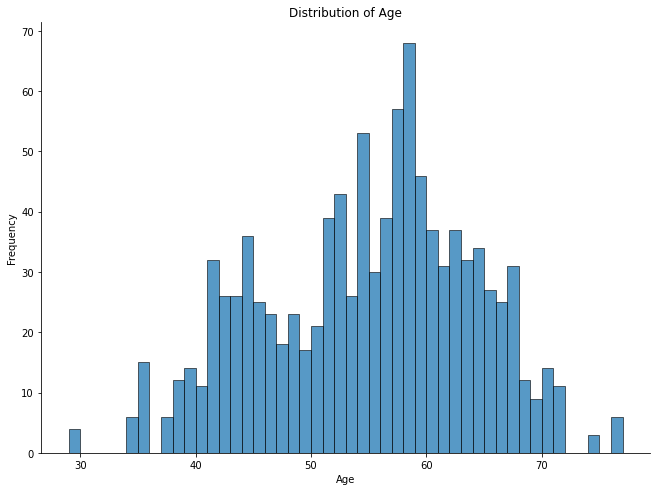

In [5]:
age_plot = sns.displot(heart_df, x='age' ,bins = np.arange(29,78,1)) #We checked the min and max and set the bins range to that
age_plot.fig.set_size_inches(10, 7)
age_plot.set(xlabel='Age', ylabel='Frequency', title='Distribution of Age')
print("We can refer from the plot that all the ages of observations are in the range 29-80 and that most of them\nare in the range of 40-70.")

Lets see the Sex distribution in our database in order to map the sex of the participants:

We can refer from the plot that there are more Male observations then Female observations. meaning, our data is imbalanced by sex.


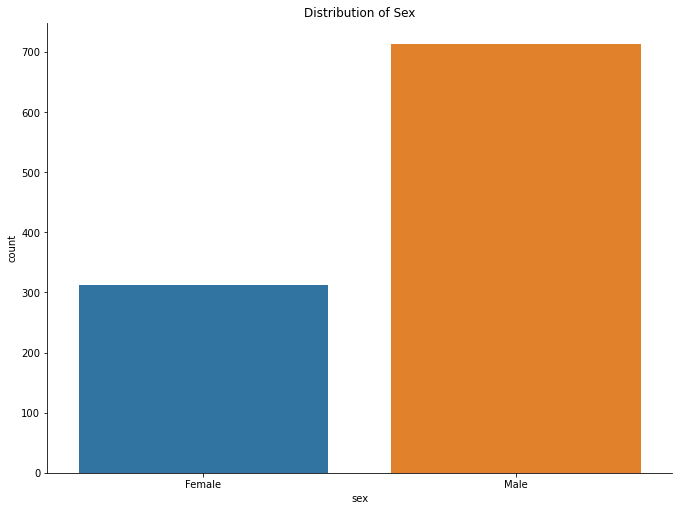

In [38]:
sex_plot = sns.catplot(data=heart_df, x='sex', kind='count')
sex_plot.set(title='Distribution of Sex')
sex_plot.fig.set_size_inches(10 ,7)
sex_plot.set_xticklabels(['Female','Male']);
print("We can refer from the plot that there are more Male observations then Female observations. meaning, our data is imbalanced by sex.")

Lets check the distribution of the target column in order to see if the number of observation with disease and without disease is balanced:

We can refer from the plot that we have in our dataset similar quantities of observation with disease and without disease.


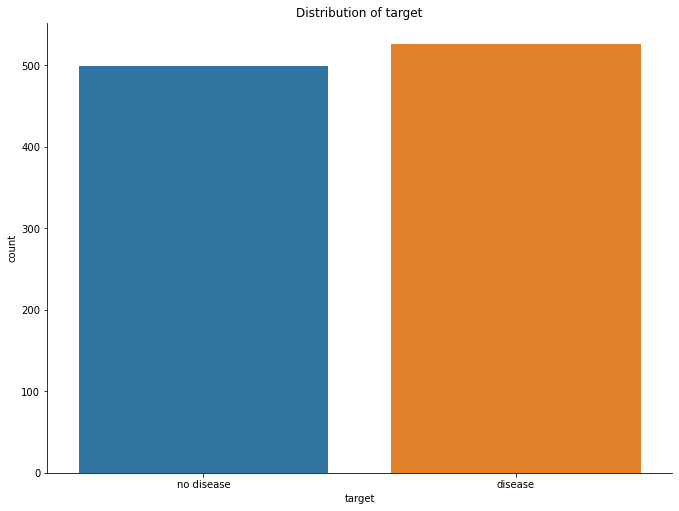

In [7]:
target_plot = sns.catplot(data=heart_df, x='target', kind='count')
target_plot.set(title='Distribution of target')
target_plot.fig.set_size_inches(10 ,7)
target_plot.set_xticklabels(['no disease','disease']);
print("We can refer from the plot that we have in our dataset similar quantities of observation with disease and without disease.")

Lets see the distribution of chest pain types:

We can refer from the plot that most observations have chest pain type 0.


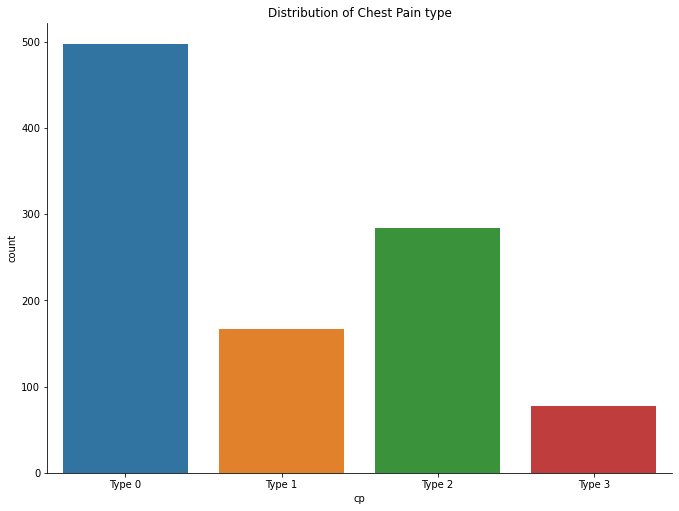

In [8]:
cp_plot = sns.catplot(data=heart_df, x='cp', kind='count')
cp_plot.set(title='Distribution of Chest Pain type')
cp_plot.fig.set_size_inches(10 ,7)
cp_plot.set_xticklabels(['Type 0','Type 1', 'Type 2', 'Type 3']);
print("We can refer from the plot that most observations have chest pain type 0.")

Lets see the distribution of the maximum heart rate achieved:

We can refer from the plot that most maximum heart rate values fall in the range 120-185.


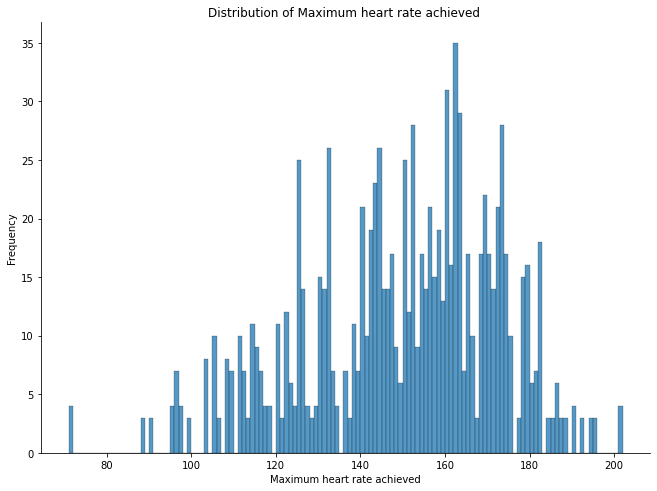

In [9]:
thalach_plot = sns.displot(heart_df, x='thalach' ,bins = np.arange(71,203,1)) #We checked the min and max and set the bins range to that
thalach_plot.fig.set_size_inches(10, 7)
thalach_plot.set(xlabel='Maximum heart rate achieved', ylabel='Frequency', title='Distribution of Maximum heart rate achieved ')
print("We can refer from the plot that most maximum heart rate values fall in the range 120-185.")

## 2. b.

The column that most consern us is the 'target' column, therefore we will compare it to different features to see if we have any correlation.

Lets compare target with sex:

We can refer from the plot that in our dataset there are more females with disease then females without.
While on the otherside we can see that it is not the case with males. Moreover, because the female to male ratio is imbalanced additional data may be necessary to understand this phenomenon.


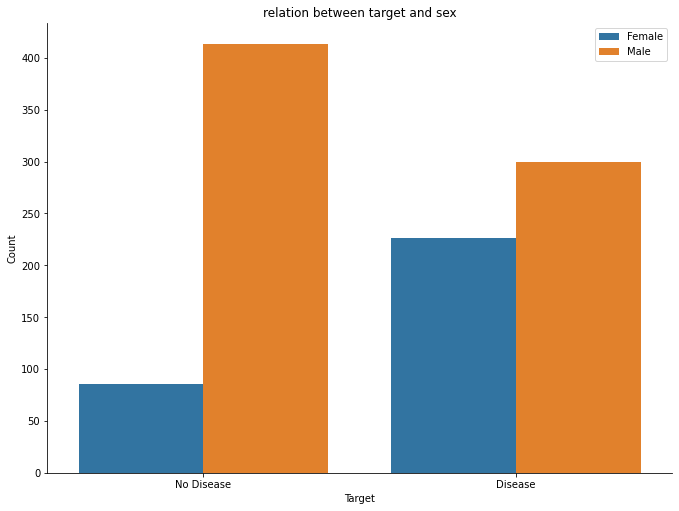

In [39]:
target_sex = sns.catplot(kind='count', x='target', hue='sex', data=heart_df, legend_out = False)
target_sex.set(xlabel='Target', ylabel='Count', title='relation between target and sex');
target_sex.set_xticklabels(['No Disease','Disease']);
target_sex.fig.set_size_inches(10, 7)
plt.legend(labels = ['Female' ,'Male'], loc='upper right');
print("We can refer from the plot that in our dataset there are more females with disease then females without.\nWhile on the otherside we can see that it is not the case with males. Moreover, because the female to male ratio is imbalanced additional data may be necessary to understand this phenomenon.")

lets compare chest pain type with target:

We saw before that the most common chest pain type in the dataset is Type 0, although now we see,
that it is only common with people without disease, and Type 2 is most common with people with disease.


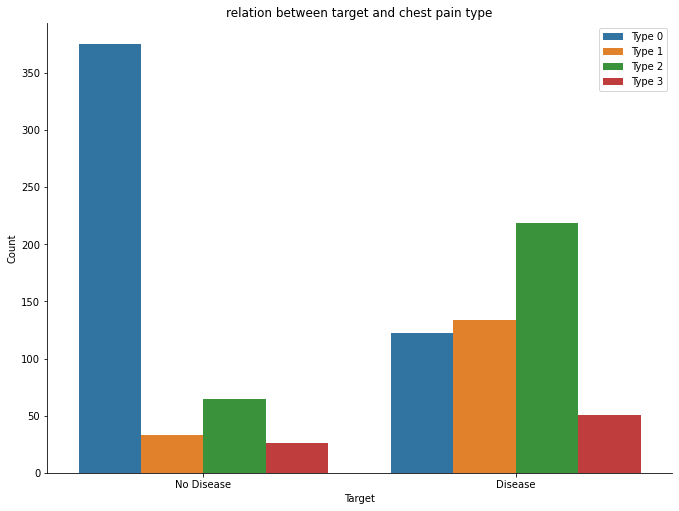

In [11]:
target_cp = sns.catplot(kind='count', x='target', hue='cp', data=heart_df, legend_out = False)
target_cp.set(xlabel='Target', ylabel='Count', title='relation between target and chest pain type');
target_cp.set_xticklabels(['No Disease','Disease']);
target_cp.fig.set_size_inches(10, 7)
plt.legend(labels = ['Type 0','Type 1', 'Type 2', 'Type 3'], loc='upper right');
print("We saw before that the most common chest pain type in the dataset is Type 0, although now we see,\nthat it is only common with people without disease, and Type 2 is most common with people with disease.")

# 3. Estimation and hypothesis testing

a. We would like to check if there is any connection between the age of the patient to his heart disease status. It interest us to know if our assumption that there are more old people with heart disease then young people,  is correct. 
In order to answer that we will calculate the median of ages and divide the observations into two groups of 'younger' and 'older'.

In [12]:
age_median = heart_df['age'].median()
heart_df['age_group'] = np.where(heart_df['age'] <= age_median , 'younger' ,'older')

b.<br>
$H_{0}$: There is an equal quantity of 'younger' people and 'older' people with heart disease.  <br>
$H_{1}$: There is *NOT* an equal quantity of 'younger' people and 'older' people with heart disease.

We will use a bootstrap method to compute a 95% confidence interval for checking our hypothesis.

Test statistic: (younger people heart disease quantity) - (older people heart disease quantity)  

In [13]:
def diff_of_size(df, column_name, groupby_var):
    grpby_var = df.groupby(groupby_var)
    count = grpby_var[column_name].sum()
    return count[1] - count[0]  # is a Series object

def bootstrap_difference(original_sample, column_name, grouping_var, num_replications):
    '''This function returns an array of bootstrapped differences between two sample averages:
      original_sample: df containing the original sample
      column_name: name of column containing the variables
      grouping_var: name of variable according to which to group
      num_replications: number of bootstrap samples'''
    original_sample_size = original_sample.shape[0] # we need to replicate with the same sample size
    original_sample_cols_of_interest = original_sample[[column_name, grouping_var]]
    bstrap_diffs = np.empty(num_replications)
    for i in range(num_replications):
        bootstrap_sample = original_sample_cols_of_interest.sample(original_sample_size, replace=True) # note WITH REPLACEMENT!
        resampled_diff = diff_of_size(bootstrap_sample, column_name, grouping_var)
        bstrap_diffs[i] = resampled_diff
    
    return bstrap_diffs

In [14]:
bootstraped_diff = bootstrap_difference(heart_df, 'target', 'age_group', 5000) #running 5000 simulations

left_end2 = np.percentile(bootstraped_diff, 2.5, interpolation='higher')    # 95% confidence interval
right_end2 =  np.percentile(bootstraped_diff, 97.5, interpolation='higher')

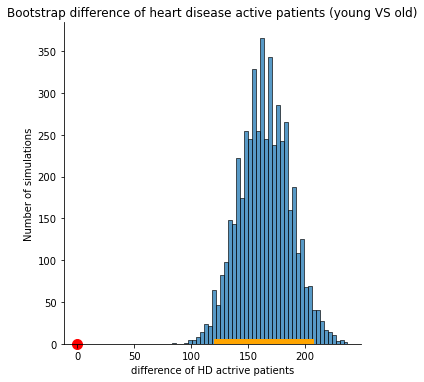

In [15]:
facetgrid_obj = sns.displot(bootstraped_diff);
facetgrid_obj.axes[0, 0].hlines(y=0, xmin=left_end2, xmax=right_end2, colors='orange', linestyles='solid', lw=10 , clip_on = True );  # show line of values between 2.5 and 97.5 percentiles
facetgrid_obj.set(title='Bootstrap difference of heart disease active patients (young VS old)', xlabel='difference of HD actrive patients', ylabel='Number of simulations');
facetgrid_obj.axes[0, 0].scatter(0 , 0, color='red', s=100 , clip_on = False );

In [36]:
print(f'The 95% boostsrap confidence interval is: [{round(left_end2, 2)} - {round(right_end2, 2)},], the red dot represents no difference in quantities.')

The 95% boostsrap confidence interval is: [120.0 - 208.0,], the red dot represents no difference in quantities.


__conclusion:__ Zero is not included in the 95% CI for the "difference of heart disease active patients (young VS old)",therefore we can reject the null hypothesis and conclude at the 95% confidence level that the number of heart disease active patient between old people and younger people is *NOT* the same. Also we can see that if we took confidence interval that is more than 95%, zero still wont be inside it.

We can see that all values are positive, that means there are more young heart disease active patients then old ones.<br>
We would like to understand more the meaning of those results and make sure there are no biases that affected our bootstrap:

First we will compare the age groups to target to see if the data is imbalanced:

As we can see those results support our claim that this dataset is imbalanced towards younger people.
In the data there are more younger people patients with heart disease then older.


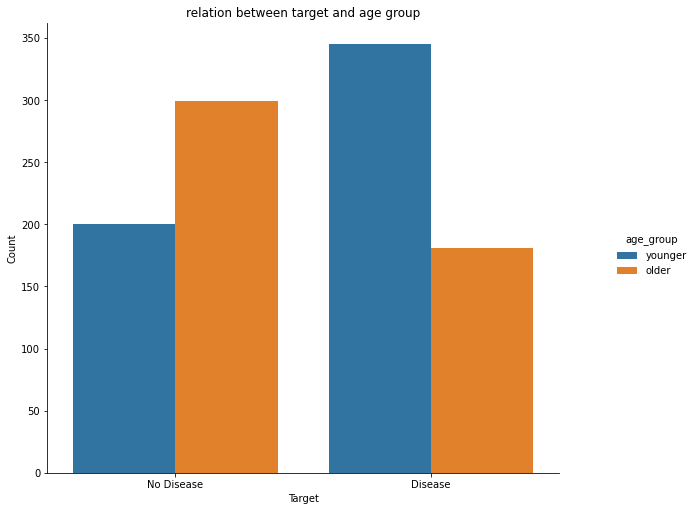

In [37]:
target_age = sns.catplot(kind='count', x='target', hue='age_group', data=heart_df)
target_age.set(xlabel='Target', ylabel='Count', title='relation between target and age group');
target_age.set_xticklabels(['No Disease','Disease']);
target_age.fig.set_size_inches(10, 7)
print("As we can see those results support our claim that this dataset is imbalanced towards younger people.\nIn the data there are more younger people patients with heart disease then older.")

Does that mean that in reality we will get equal results?, assuming our dataset represent the total population why is that the case?

In order to fully understand this phenomenon, we browsed online for more information.
One source that we found give a possible explanation:

https://ourworldindata.org/grapher/cardiovascular-disease-death-rates-by-age?time=earliest..2017&country=~OWID_WRL

The data contains Cardiovascular disease death rates by age worldwide, 1990 to 2017. 
The Death rates from cardiovascular disease measured per 100,000 individuals across various age categories.

In [18]:
death_df = pd.read_csv('cardiovascular-disease-death-rates-by-age.csv')

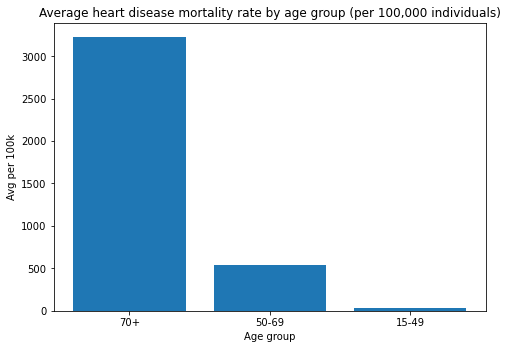

In [19]:
mean_age = np.empty(3)
age_labels = np.array(['70+','50-69','15-49'])
mean_age[0] = np.mean(death_df['Deaths - Cardiovascular diseases - Sex: Both - Age: 70+ years (Rate)'])
mean_age[1] = np.mean(death_df['Deaths - Cardiovascular diseases - Sex: Both - Age: 50-69 years (Rate)'])
mean_age[2] = np.mean(death_df['Deaths - Cardiovascular diseases - Sex: Both - Age: 15-49 years (Rate)'])

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set(title='Average heart disease mortality rate by age group (per 100,000 individuals)');
ax.bar(age_labels,mean_age)
plt.xlabel('Age group')
plt.ylabel('Avg per 100k')
plt.show()

We can understand from this plot that most heart disease death cases happen within the 70+ age group. Meaning , a possible explanation to the results above is that people from this age group (70+) are more likely to die from a heart disease, therefore, there are less active patients from this age group.

To sum up, a possible explanation to our results in the bootstrap, is the mortality rate of older population groups vs younger population groups.

# 4. Prediction

a. We would like to classify if an individual has a heart disease or not. It interest us to know if the features in our data are enough for us to tell if a person has a heart disease.

A potential application of an algorithm that classifies if a person has a hearth disease is a website that determines if the user has a heart disease or not acording to his medical data that he has entered.

b.<br>Our target variable class is 'target'.<br>In order to select the best features for the case we will look at their correlation with our target variable: 

First we will create dummies for our categorical nominal features and then normalize  all the features:

In [20]:
new_df = heart_df.iloc[:,:13].copy()
new_df = pd.get_dummies(new_df, columns=['sex', 'cp', 'fbs', 'restecg' , 'exang', 'slope' ,'thal'], drop_first = True)
df_columns = new_df.columns
scaler = MinMaxScaler()
scaled_np_matrix = scaler.fit_transform(new_df)
scaled_df = pd.DataFrame(scaled_np_matrix, columns=df_columns)
scaled_df.insert(0, 'target', heart_df['target'])

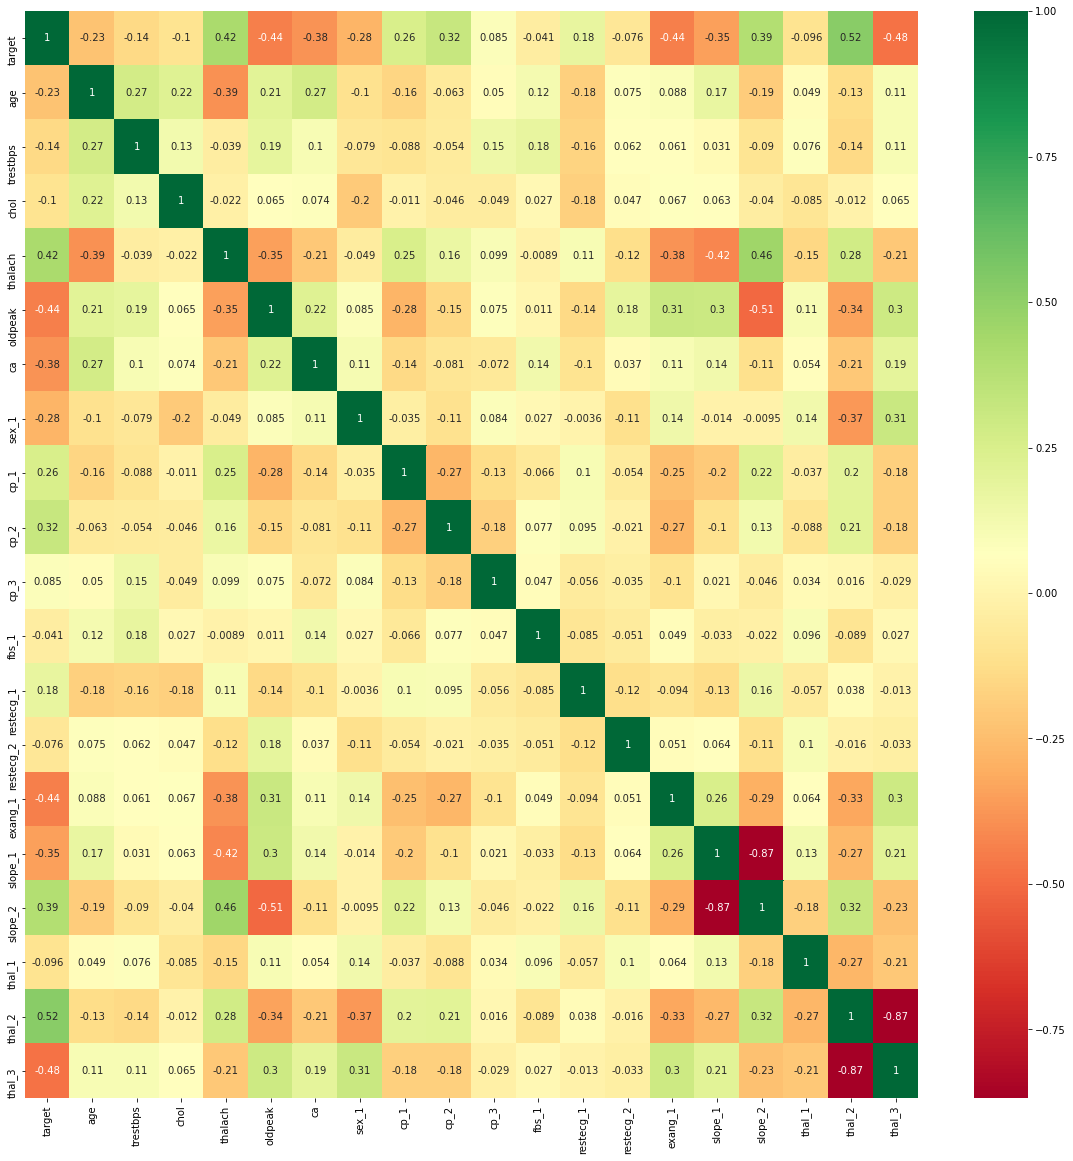

In [21]:
# compute correlation between each pair of variables in data frame
correlations = scaled_df.corr()

#plot heat map
plt.figure(figsize=(20,20))
g=sns.heatmap(correlations,annot=True,cmap="RdYlGn")

After looking at the correlations we decided to remove : 'chol', 'trestbps', 'restecg'. All that because their correlation with our label is low. Moreover we decided to keep some features that one of their dummies has less correlation than the others because in total the feature itself has a good correlation.

In [22]:
fixed_df = scaled_df.drop(columns=['trestbps', 'chol', 'restecg_1', 'restecg_2'],axis = 1, inplace = False)

c. Now will will dicide the best K for our algorithm:

In [23]:
X = fixed_df.iloc[:, 1:]  # features
Y = fixed_df.iloc[:, 0]  # labels

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20)  

k_avg_score = np.zeros(21)
for k in range(1, 21):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn_model, X_train, Y_train, cv=5)
    k_avg_score[k] = cv_scores.mean()

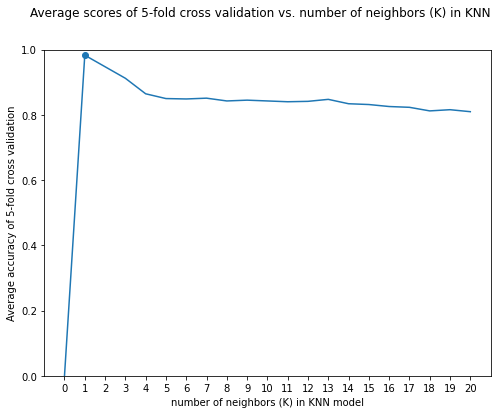

In [24]:
fig, ax = plt.subplots()
ax.plot(k_avg_score)
ax.set_xticks(np.arange(0, 21));
ax.set_ylim(0, 1)
ax.scatter(np.argmax(k_avg_score), np.max(k_avg_score)) # argmax returns the index of the maximum value
fig.set_size_inches(8, 6)
fig.suptitle('Average scores of 5-fold cross validation vs. number of neighbors (K) in KNN')
ax.set_xlabel('number of neighbors (K) in KNN model')
ax.set_ylabel('Average accuracy of 5-fold cross validation');

In [25]:
print(f"best average accuracy cv score is: {np.max(k_avg_score)}, for number of neighbors(K) = {np.argmax(k_avg_score)}")

best average accuracy cv score is: 0.9829268292682928, for number of neighbors(K) = 1


In [26]:
# fit the model on the entire train set
knn = KNeighborsClassifier(n_neighbors=np.argmax(k_avg_score))
knn.fit(X_train, Y_train)

# test the model on the test set
test_score = knn.score(X_test, Y_test)
print(f"Test accuracy score is: {test_score}")

Test accuracy score is: 1.0


This result seems "too good to be true", so we checked our dataset more carefully and found a possible reason for that.
We found that the OP might have used resampling with replacement to populate the dataset. the 1025 samples give better results for prediction but most of them might be duplicates. Although, we cannot tell for sure because of the reason we mentioned in Question 1d.

To prevent a situation where the records in our train set appear also in the test set we will remove the possible duplicates.


Lets try to predict with only unique observations: 

In [27]:
corrected_df = scaled_df.drop_duplicates()
print(f"The number of unique observations in our dataset is {corrected_df.shape[0]}")

The number of unique observations in our dataset is 302


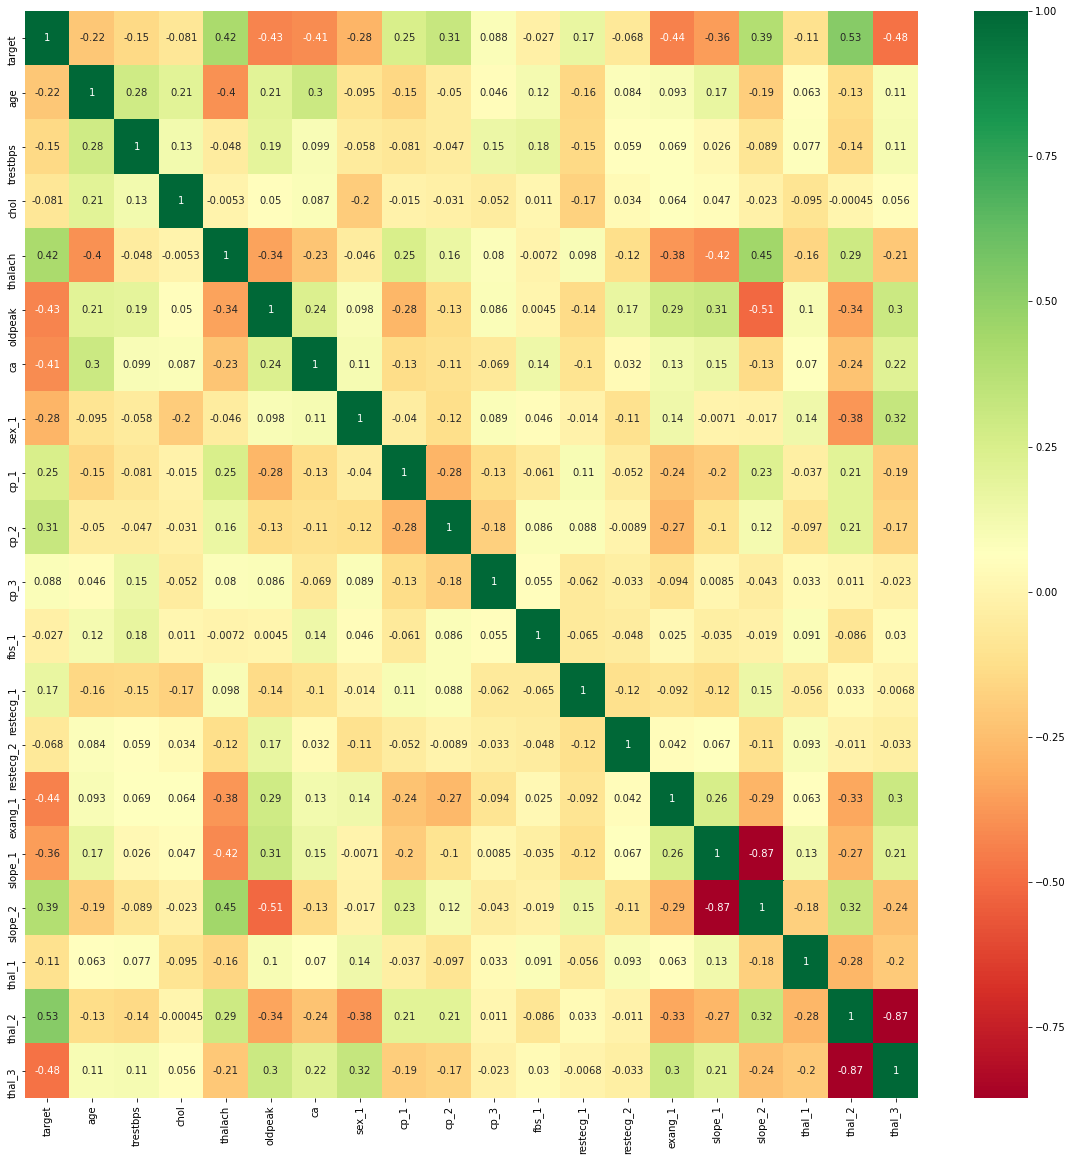

In [28]:
# compute correlation between each pair of variables in data frame
correlations_corrected = corrected_df.corr()

#plot heat map
plt.figure(figsize=(20,20))
h=sns.heatmap(correlations_corrected,annot=True,cmap="RdYlGn")

After looking again at the correlations we decided to remove : 'chol', 'trestbps', 'restecg' ,'fbs'. All that because their correlation with our label is low. Moreover again we decided to keep some features that one of their dummies has less correlation than the others because in total the feature itself has a good correlation.

In [29]:
corrected_df.drop(columns=['trestbps', 'chol', 'restecg_1', 'restecg_2', 'fbs_1'],axis = 1, inplace = True)

In [30]:
X1 = corrected_df.iloc[:, 1:]  # features
Y1 = corrected_df.iloc[:, 0]  # labels

X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.20)  

k_avg_score1 = np.zeros(21)
for k in range(1, 21):
    knn_model1 = KNeighborsClassifier(n_neighbors=k)
    cv_scores1 = cross_val_score(knn_model1, X1_train, Y1_train, cv=5)
    k_avg_score1[k] = cv_scores1.mean()

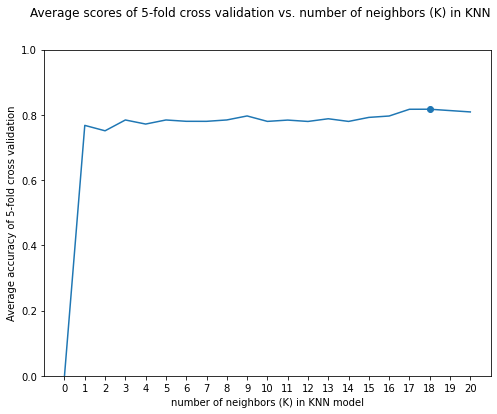

In [31]:
fig1, ax1 = plt.subplots()
ax1.plot(k_avg_score1)
ax1.set_xticks(np.arange(0, 21));
ax1.set_ylim(0, 1)
ax1.scatter(np.argmax(k_avg_score1), np.max(k_avg_score1)) # argmax returns the index of the maximum value
fig1.set_size_inches(8, 6)
fig1.suptitle('Average scores of 5-fold cross validation vs. number of neighbors (K) in KNN')
ax1.set_xlabel('number of neighbors (K) in KNN model')
ax1.set_ylabel('Average accuracy of 5-fold cross validation');

In [32]:
print(f"best average accuracy cv score is: {np.max(k_avg_score1)}, for number of neighbors(K) = {np.argmax(k_avg_score1)}")

best average accuracy cv score is: 0.8173469387755101, for number of neighbors(K) = 18


In [33]:
# fit the model on the entire train set
knn1 = KNeighborsClassifier(n_neighbors=np.argmax(k_avg_score1))
knn1.fit(X1_train, Y1_train)

# test the model on the test set
test_score1 = knn1.score(X1_test, Y1_test)
print(f"Test accuracy score is: {test_score1}")

Test accuracy score is: 0.7868852459016393


As we can see now the test accuracy is less than before so now we can check with confusion matrix the precision, and recall scores:

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Compute a confusion matrix
predictions = knn1.predict(X=X1_test) # get the classifier's predictions
cmtx = pd.DataFrame(
    confusion_matrix(Y1_test, predictions, labels=[0, 1]), 
    index=['real: 0', 'real: 1'], columns=['pred: 0', 'pred: 1']
)
print(cmtx)

         pred: 0  pred: 1
real: 0       22        7
real: 1        6       26


In [35]:
print(f"Precision score is:{precision_score(Y1_test, predictions)}") #How many of my positive predictions are correct
print(f"recall score is:{recall_score(Y1_test, predictions)}") #How many of the actual positive values I have successfully predicted
print(f"f1 score is:{f1_score(Y1_test, predictions)}") #F1 score is harmonic average of precision and recall

Precision score is:0.7878787878787878
recall score is:0.8125
f1 score is:0.8


In conclusion, we can see that the classifier scores with unique observations are lower than the scores of the original classifier, therefore we will prefer to use the latter classifier with unique observations to prevent data leakage situation.